In [52]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy.orm import Session


In [53]:
import numpy as np
import pandas as pd

In [54]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [56]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [58]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table
Measurement = Base.classes.measurement
#station,date,prcp,tobs
Station = Base.classes.station
#station,name,latitude,longitude,elevation

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [61]:
first_row=session.query(Measurement.date).order_by(Measurement.date.desc()).all()
first_row

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

# Exploratory Climate Analysis

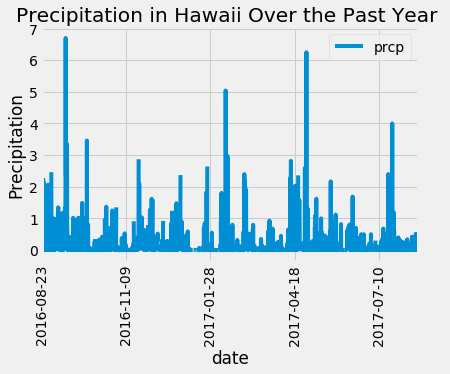

In [83]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year = '2016-08-23'

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
precip_2016 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
precip= pd.DataFrame(precip_2016)
date_index= precip.set_index("date")
date_index
# Sort the dataframe by date
sorted_precip=date_index.sort_index()
sorted_precip
# Use Pandas Plotting with Matplotlib to plot the data
Hawaii_precip =sorted_precip.plot(title = "Precipitation in Hawaii Over the Past Year ", rot=90)
plt.ylabel("Precipitation")
plt.show()

![precipitation](Images/precipitation.png)

In [70]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_precip.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [72]:
# Design a query to show how many stations are available in this dataset?
num_of_stations=session.query(func.count(Station.name)).all()
num_of_stations

[(9)]

In [92]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations =session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [115]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
#highest temperature recorded, and average temperature of the most active station?
temps = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station =='USC00519281').all()
temps


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

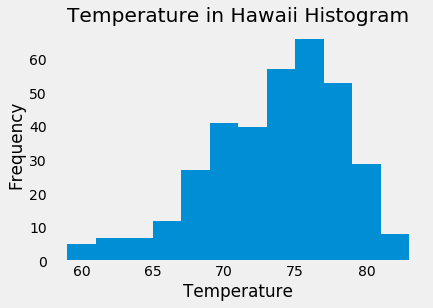

In [139]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_USC00519281= session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= last_year).filter(Measurement.station== 'USC00519281').all()
station_temps = pd.DataFrame(station_USC00519281)
n, bins, patches = plt.hist(x = (station_temps['tobs']), bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature in Hawaii Histogram")
plt.grid(alpha =0.0)
#plt.legend()
plt.show()

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
